In [47]:
import json

In [48]:

import warnings
warnings.filterwarnings("ignore")

In [49]:
with open("dz_recipes.json") as f:
    recipes = json.load(f)

In [50]:
print(recipes[0])

{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}


In [51]:
print(recipes[0]['ingredients'][0])

romaine lettuce


In [52]:
from gensim import corpora, models
import numpy as np

In [53]:
texts = [recipe["ingredients"] for recipe in recipes]
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [54]:
print(texts[0])
print(corpus[0])

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


In [55]:
from gensim.models import ldamodel 

In [56]:
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

# Create a corpus from a list of texts
common_dictionary = Dictionary(common_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in common_texts]

# Train the model on the corpus.
lda = models.ldamodel.LdaModel(common_corpus, num_topics=10)

In [57]:
from gensim.test.utils import datapath

# Save model to disk.
temp_file = datapath("model")
lda.save(temp_file)

# Load a potentially pretrained model from disk.
lda = models.ldamodel.LdaModel.load(temp_file)

In [58]:
# Create a new corpus, made of previously unseen documents.
other_texts = [
    ['computer', 'time', 'graph'],
    ['survey', 'response', 'eps'],
    ['human', 'system', 'computer']
]
other_corpus = [common_dictionary.doc2bow(text) for text in other_texts]

unseen_doc = other_corpus[0]
vector = lda[unseen_doc]  # get topic probability distribution for a document

In [59]:
lda.update(other_corpus)
vector = lda[unseen_doc]

In [60]:
lda = models.ldamodel.LdaModel(common_corpus, num_topics=50, alpha='auto', eval_every=5)  # learn asymmetric alpha from data

In [61]:
other_corpus

[[(0, 1), (6, 1), (10, 1)], [(3, 1), (4, 1), (8, 1)], [(0, 1), (1, 1), (5, 1)]]

In [62]:
vector

[(0, 0.27500236),
 (1, 0.025001947),
 (2, 0.025000026),
 (3, 0.025000028),
 (4, 0.025002467),
 (5, 0.025006946),
 (6, 0.025000025),
 (7, 0.52498424),
 (8, 0.025000028),
 (9, 0.025001947)]

In [63]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    print (c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs)
    with open("cooking_LDA_pa_task1.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]]))

In [64]:
np.random.seed(76543)
lda = models.ldamodel.LdaModel(corpus,id2word=dictionary, num_topics=50,passes=5)

In [65]:
np.random.seed(76543)
res = lda.show_topics(num_topics=40, num_words=10,formatted=0)

In [66]:
dict_id2token = dictionary.id2token

In [67]:
res

[(15,
  [('chicken stock', 0.085647576),
   ('dried thyme', 0.07502947),
   ('green bell pepper', 0.07411843),
   ('onions', 0.06460672),
   ('bay leaves', 0.060130946),
   ('celery', 0.048906244),
   ('cayenne', 0.04770059),
   ('garlic', 0.036120508),
   ('salt', 0.035625324),
   ('ground black pepper', 0.031201737)]),
 (10,
  [('lemon', 0.25738916),
   ('orange', 0.06990471),
   ('sugar', 0.05156181),
   ('fresh orange juice', 0.045650903),
   ('white wine vinegar', 0.036935106),
   ('water', 0.036345847),
   ('orange zest', 0.03536323),
   ('sun-dried tomatoes', 0.031613752),
   ('mascarpone', 0.028842349),
   ('sweetened condensed milk', 0.026309052)]),
 (21,
  [('soy sauce', 0.111016564),
   ('sesame oil', 0.067109816),
   ('corn starch', 0.05664513),
   ('green onions', 0.047489498),
   ('sugar', 0.04650509),
   ('garlic', 0.0439945),
   ('rice vinegar', 0.043620132),
   ('water', 0.033870563),
   ('vegetable oil', 0.030812947),
   ('salt', 0.027791224)]),
 (9,
  [('canola oil',

In [68]:
words = []
for topic in res:
    for word_prob in topic[1]:
        word, _ = word_prob
        words.append(word)

In [69]:
words

['chicken stock',
 'dried thyme',
 'green bell pepper',
 'onions',
 'bay leaves',
 'celery',
 'cayenne',
 'garlic',
 'salt',
 'ground black pepper',
 'lemon',
 'orange',
 'sugar',
 'fresh orange juice',
 'white wine vinegar',
 'water',
 'orange zest',
 'sun-dried tomatoes',
 'mascarpone',
 'sweetened condensed milk',
 'soy sauce',
 'sesame oil',
 'corn starch',
 'green onions',
 'sugar',
 'garlic',
 'rice vinegar',
 'water',
 'vegetable oil',
 'salt',
 'canola oil',
 'fat free less sodium chicken broth',
 'garlic cloves',
 'sliced green onions',
 'low sodium soy sauce',
 'cooking spray',
 'finely chopped onion',
 'large shrimp',
 'flank steak',
 'dry sherry',
 'scallions',
 'mushrooms',
 'carrots',
 'vegetable oil',
 'Sriracha',
 'soy sauce',
 'green beans',
 'unsweetened coconut milk',
 'kosher salt',
 'toasted sesame oil',
 'fresh lemon juice',
 'whipping cream',
 'grated lemon zest',
 'sweet onion',
 'cooked chicken',
 'sugar',
 'strawberries',
 'bananas',
 'sliced almonds',
 'butte

In [70]:
key_words = ["salt", "sugar", "water", "mushrooms", "chicken", "eggs"]
key_words_count = [0]*6

In [71]:
for i,word in enumerate(key_words):
    key_words_count[i] = words.count(word)

In [72]:
key_words_count

[17, 7, 7, 1, 1, 1]

In [73]:
key_words

['salt', 'sugar', 'water', 'mushrooms', 'chicken', 'eggs']

In [74]:
answer = list(zip(key_words,key_words_count))

In [75]:
answer

[('salt', 17),
 ('sugar', 7),
 ('water', 7),
 ('mushrooms', 1),
 ('chicken', 1),
 ('eggs', 1)]

In [76]:
import copy
dictionary2 = copy.deepcopy(dictionary)

In [77]:
dictionary2[0]

'black olives'

In [78]:
keys_mas = []
for i in dictionary2.dfs.keys():
    if dictionary2.dfs[i] > 4000:
        keys_mas.append(i)

In [79]:
keys_mas

[3, 5, 15, 11, 18, 20, 29, 44, 52, 59, 104, 114]

In [80]:
dictionary2_filter = copy.deepcopy(dictionary2)
dictionary2_filter.filter_tokens(keys_mas)

In [81]:
dict_size_before  = len(dictionary)

In [82]:
dict_size_after  = len(dictionary2_filter)

In [83]:
corpus2 = [dictionary2_filter.doc2bow(text) for text in texts]  # составляем корпус документов

In [84]:
corpus_size_before = 0
corpus_size_after = 0

In [85]:
for i in corpus:
    corpus_size_before += len(i)

In [86]:
for i in corpus2:
    corpus_size_after += len(i)

In [87]:
corpus_size_before

428249

In [88]:
corpus_size_after

343665

In [96]:
np.random.seed(76543)
lda2 = models.ldamodel.LdaModel(corpus2,id2word=dictionary2_filter, num_topics=40, passes=5)

In [97]:
lda2.top_topics(corpus2) 

[([(0.09805375, 'sour cream'),
   (0.06260539, 'chili powder'),
   (0.05980345, 'salsa'),
   (0.059037488, 'flour tortillas'),
   (0.051727302, 'ground cumin'),
   (0.04961991, 'black beans'),
   (0.04192349, 'corn tortillas'),
   (0.026852604, 'green onions'),
   (0.026822893, 'shredded cheddar cheese'),
   (0.02587056, 'diced tomatoes'),
   (0.022652298, 'chopped cilantro fresh'),
   (0.022008648, 'shredded Monterey Jack cheese'),
   (0.019809257, 'enchilada sauce'),
   (0.01973095, 'cooked chicken'),
   (0.019138185, 'cumin'),
   (0.017684413, 'dried oregano'),
   (0.017233409, 'green chile'),
   (0.01695693, 'chicken broth'),
   (0.016009528, 'avocado'),
   (0.0155102685, 'tomatoes')],
  -2.5968612427410345),
 ([(0.095774814, 'jalapeno chilies'),
   (0.07228091, 'lime'),
   (0.061941132, 'lime juice'),
   (0.0601038, 'avocado'),
   (0.046930876, 'purple onion'),
   (0.046747133, 'cilantro'),
   (0.042781793, 'chopped cilantro'),
   (0.0423511, 'fresh cilantro'),
   (0.03528913, 'to

In [98]:
lda.top_topics(corpus)

[([(0.09322202, 'diced tomatoes'),
   (0.079893984, 'onions'),
   (0.0731484, 'garlic'),
   (0.07232613, 'dried oregano'),
   (0.07046162, 'tomato paste'),
   (0.069645785, 'olive oil'),
   (0.06710402, 'salt'),
   (0.053331494, 'tomato sauce'),
   (0.033236723, 'crushed tomatoes'),
   (0.031145396, 'water'),
   (0.03095829, 'red pepper flakes'),
   (0.026799725, 'pepper'),
   (0.024938513, 'ground black pepper'),
   (0.020810883, 'green bell pepper'),
   (0.016094847, 'ground beef'),
   (0.015642809, 'garlic cloves'),
   (0.015389849, 'fresh parsley'),
   (0.014196834, 'red bell pepper'),
   (0.014162836, 'carrots'),
   (0.013748938, 'bay leaf')],
  -2.4521979240521072),
 ([(0.111016564, 'soy sauce'),
   (0.067109816, 'sesame oil'),
   (0.05664513, 'corn starch'),
   (0.047489498, 'green onions'),
   (0.04650509, 'sugar'),
   (0.0439945, 'garlic'),
   (0.043620132, 'rice vinegar'),
   (0.033870563, 'water'),
   (0.030812947, 'vegetable oil'),
   (0.027791224, 'salt'),
   (0.027019626,

In [107]:
sum_1 = 0
for i in lda.top_topics(corpus):
    sum_1 += i[1]

In [108]:
sum_2 = 0
for i in lda2.top_topics(corpus2):
    sum_2 += i[1]

In [109]:
sum_1

-355.4498960243814

In [110]:
sum_2

-327.7061763470161

In [104]:
coherence = np.mean( [coh[1] for coh in ldamodel.top_topics(corpus)] )
print(coherence)

AttributeError: module 'gensim.models.ldamodel' has no attribute 'top_topics'

In [133]:
np.random.seed(76543)
# здесь код для построения модели:
lda2 = models.ldamodel.LdaModel(corpus2, id2word=dictionary2_filter, num_topics=40, passes=5)

In [134]:
tokens = np.array(lda.top_topics(corpus))
tokens2 = np.array(lda2.top_topics(corpus2))
coherence = np.mean(tokens[:,1:])
coherence2 = np.mean(tokens2[:,1:])
print(coherence, coherence2)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (50, 2) + inhomogeneous part.

In [135]:
tokens

NameError: name 'tokens' is not defined

In [136]:
lda2.get_document_topics(corpus2[2])

[(11, 0.17832658),
 (15, 0.10251449),
 (17, 0.10332813),
 (21, 0.10252313),
 (22, 0.19466242),
 (23, 0.13359892),
 (29, 0.102524996)]

In [137]:
corpus2[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]

In [138]:
lda2.alpha

array([0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025], dtype=float32)

In [184]:
np.random.seed(76543)
lda3 = models.ldamodel.LdaModel(corpus2,id2word=dictionary2_filter,alpha=1,passes=5,num_topics = 40)

In [185]:
arr_1 = np.array(lda2.get_document_topics(corpus2,minimum_probability = 0.01))
arr_2 = np.array(lda3.get_document_topics(corpus2,minimum_probability = 0.01))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (39774,) + inhomogeneous part.

In [186]:
np.sum(np.sum(arr_1,axis=1),axis=0)[1]

39773.999996108

In [187]:
lda2.get_document_topics(corpus2[0],minimum_probability = 0.01)

[(25, 0.12812185), (31, 0.61756724), (33, 0.13868268)]

In [188]:
doc_1 = lda2.get_document_topics(corpus2,minimum_probability = 0.01)
doc_2 = lda3.get_document_topics(corpus2,minimum_probability = 0.01)

In [193]:
sum_1 = 0
sum_2 = 0
for i in doc_1:
    sum_1 += len(i) 
for i in doc_2:
    sum_2 += len(i) 

In [194]:
sum_1

203686

In [195]:
sum_2

1590960

In [197]:
lda3.alpha

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.], dtype=float32)

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [211]:
doc_words_matrix = np.array(lda2.get_document_topics(corpus2,minimum_probability = -1))[:,:,1]

In [222]:
y = np.empty(len(recipes), dtype='U25')
for i,j in enumerate(recipes):
    y[i] = j['cuisine']

In [214]:
recipes

[{'id': 10259,
  'cuisine': 'greek',
  'ingredients': ['romaine lettuce',
   'black olives',
   'grape tomatoes',
   'garlic',
   'pepper',
   'purple onion',
   'seasoning',
   'garbanzo beans',
   'feta cheese crumbles']},
 {'id': 25693,
  'cuisine': 'southern_us',
  'ingredients': ['plain flour',
   'ground pepper',
   'salt',
   'tomatoes',
   'ground black pepper',
   'thyme',
   'eggs',
   'green tomatoes',
   'yellow corn meal',
   'milk',
   'vegetable oil']},
 {'id': 20130,
  'cuisine': 'filipino',
  'ingredients': ['eggs',
   'pepper',
   'salt',
   'mayonaise',
   'cooking oil',
   'green chilies',
   'grilled chicken breasts',
   'garlic powder',
   'yellow onion',
   'soy sauce',
   'butter',
   'chicken livers']},
 {'id': 22213,
  'cuisine': 'indian',
  'ingredients': ['water', 'vegetable oil', 'wheat', 'salt']},
 {'id': 13162,
  'cuisine': 'indian',
  'ingredients': ['black pepper',
   'shallots',
   'cornflour',
   'cayenne pepper',
   'onions',
   'garlic paste',
   'm

In [224]:
y.shape

(39774,)

In [225]:
clasificater = RandomForestClassifier(n_estimators=100)

In [227]:
cross_val_score(clasificater,doc_words_matrix,y,cv=3).mean()

0.5548348167144365

In [230]:
doc_words_matrix.size

1590960

In [231]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = np.array([x[1] for x in topic])
        terms = [x[0] for x in topic]
        topic_distr /= topic_distr.sum()
        w = np.random.choice(terms, p=topic_distr)
        print (w)

In [234]:
generate_recipe(lda2, 4)

part-skim ricotta cheese
warm water
thai chile
provolone cheese


In [248]:
np.random.dirichlet(lda2.alpha)

array([2.07134362e-41, 1.58312632e-09, 7.27510601e-08, 7.82651451e-07,
       2.22956593e-19, 3.20950153e-04, 8.19411805e-09, 5.48316755e-12,
       7.06798543e-09, 1.35455689e-04, 1.06632792e-15, 2.22655387e-07,
       3.40808729e-35, 4.84783448e-13, 5.72267860e-03, 8.55327057e-01,
       4.01138661e-31, 8.15418403e-10, 7.89894512e-07, 1.26986471e-08,
       4.64121937e-02, 1.43684585e-02, 8.99475750e-11, 5.40891992e-15,
       4.55075308e-21, 7.65361209e-14, 1.95881037e-06, 4.19030897e-15,
       5.14957084e-14, 2.17976091e-18, 3.20961321e-03, 1.30722072e-05,
       7.15657280e-02, 8.85246357e-41, 7.62924757e-08, 1.84485580e-34,
       1.59788922e-19, 2.88436593e-22, 2.92085955e-03, 4.50965141e-28])

In [242]:
import matplotlib.pyplot as plt

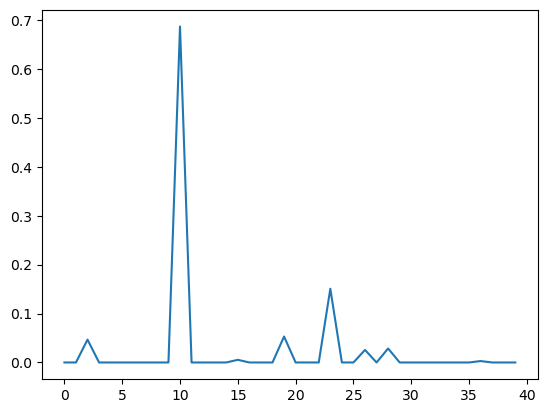

In [249]:
plt.plot(np.random.dirichlet(lda2.alpha))

In [250]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [251]:

def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [252]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    seaborn.heatmap(tc_matrix, square=True)

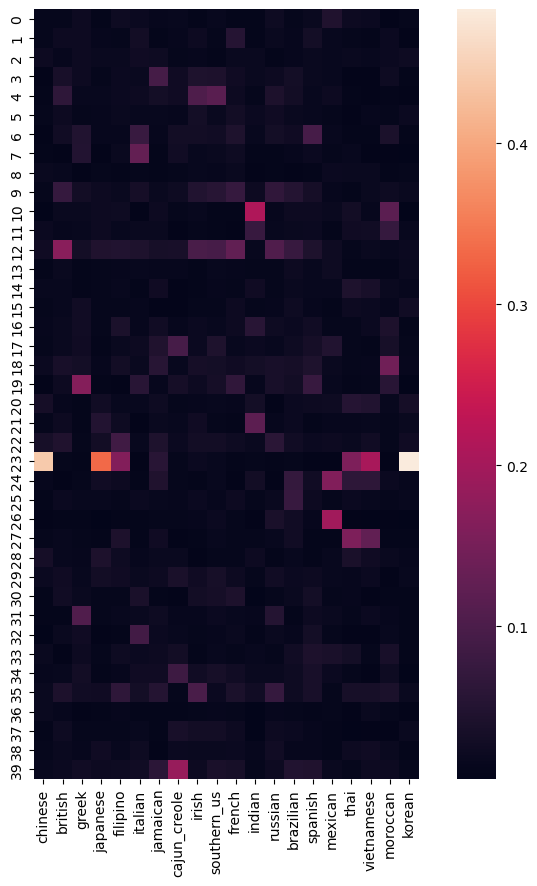

In [253]:
# Визуализируйте матрицу
tc_matrix = compute_topic_cuisine_matrix(lda2,corpus2,recipes)
plot_matrix(tc_matrix)